In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy as sp
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# 1.  Import the spam dataset and print the first six rows. 

In [2]:
os.chdir('/Users/gua/Desktop') 
df = pd.read_csv("spam_dataset.csv")
df.head(6)

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


# 2.  Read through the documentation of the original dataset here: 
# The dependent variable is "spam" where one indicates that an email is spam and zero otherwise.  Which three variables in the dataset do you think will be important predictors in a model of spam?  Why?

In [3]:
df.columns

Index(['word_freq_make:', 'word_freq_address:', 'word_freq_all:',
       'word_freq_3d:', 'word_freq_our:', 'word_freq_over:',
       'word_freq_remove:', 'word_freq_internet:', 'word_freq_order:',
       'word_freq_mail:', 'word_freq_receive:', 'word_freq_will:',
       'word_freq_people:', 'word_freq_report:', 'word_freq_addresses:',
       'word_freq_free:', 'word_freq_business:', 'word_freq_email:',
       'word_freq_you:', 'word_freq_credit:', 'word_freq_your:',
       'word_freq_font:', 'word_freq_000:', 'word_freq_money:',
       'word_freq_hp:', 'word_freq_hpl:', 'word_freq_george:',
       'word_freq_650:', 'word_freq_lab:', 'word_freq_labs:',
       'word_freq_telnet:', 'word_freq_857:', 'word_freq_data:',
       'word_freq_415:', 'word_freq_85:', 'word_freq_technology:',
       'word_freq_1999:', 'word_freq_parts:', 'word_freq_pm:',
       'word_freq_direct:', 'word_freq_cs:', 'word_freq_meeting:',
       'word_freq_original:', 'word_freq_project:', 'word_freq_re:',
       '

The three variables I chose were： 

1.'word_freq_internet:': percentage of words in the e-mail that match internet

2.'char_freq_!:': percentage of characters in the e-mail that match !

3.'capital_run_length_average:': average length of uninterrupted sequences of capital letters

I picked one variable each for words, symbols, and capital letters. I think the word "internet" will be used a lot in ads, and both exclamation points and capital letters can convey strong emotions and might be used in promotional mailings. Therefore, these three variables can be important indicators to measure spam.

# 3.  Visualize the univariate distribution of each of the variables in the previous question. 

Text(0.5, 1.0, 'word_freq_internet:')

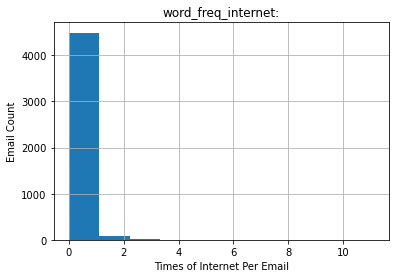

In [4]:
df['word_freq_internet:'].hist()
plt.xlabel('Times of Internet Per Email')
plt.ylabel('Email Count')
plt.title('word_freq_internet:')   

Text(0.5, 1.0, 'char_freq_!:')

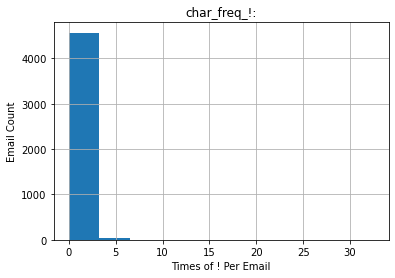

In [5]:
df['char_freq_!:'].hist()
plt.xlabel('Times of ! Per Email')
plt.ylabel('Email Count')
plt.title('char_freq_!:')   

Text(0.5, 1.0, 'capital_run_length_average:')

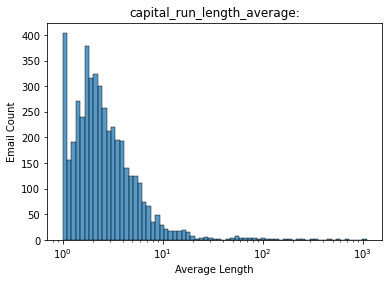

In [6]:
sns.histplot(df['capital_run_length_average:'], log_scale=True)
plt.xlabel('Average Length')
plt.ylabel('Email Count')
plt.title('capital_run_length_average:')   

# 4. Name each of the supervised learning models that we have learned thus far that are used to predict dependent variables like "spam".   

Linear regression; Logistic regression; KNN Classifier; Decision Tree; Bagged Tree; Random forest

# 5. Describe the importance of training and test data.  Why do we separate data into these subsets?

We need to separate the training set from the test set to ensure that the model can be generalized. We use the training set to build our model and the test set to evaluate the accuracy of our model. If we did not divide the data into subsets, the model would memorize the data in the training set. That is, we won't be able to verify that the model works on unknown data, and we won't be able to be sure that the model will perform well when predicting the data. Therefore, it is very important to split the data so that part of the data is used to develop the model and part of the data is used to test the model.

# 6. What is k-fold cross validation and what do we use it for? 

k-fold cross validation is a way to test performance on data. k means to split the dataset into 'k' partial folds. For example, performing 10-fold cross-validation implies k=10. We use k-fold cross validation to estimate the overall performance of the model when used to make predictions on data not used during model training.

# 7. How is k-fold cross validation different from stratified k-fold cross validation?



Stratified k-fold cross validation ensures that each fold of the dataset has the same proportion of variables with a given label. For example, if our dataset contains 40% males and 60% females, then stratified k-fold cross validation will keep the same proportions in the validation and training sets. However, simple k-fold cross-validation cannot guarantee that each fold is representative, that is, there may be extreme cases where there are only males in the validation set.

# 8. Choose one model from question four.  Split the data into training and test subsets.  Build a model with the three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k).  Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  

In [7]:
X = df.loc[:, ['word_freq_internet:', 'char_freq_!:', 'capital_run_length_average:']]
y = df['spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 50)

view_dimension = [X_train.shape, X_test.shape, y_train.shape, y_test.shape]
print(view_dimension)

[(3450, 3), (1151, 3), (3450,), (1151,)]


In [8]:
X.head()

,word_freq_internet:,char_freq_!:,capital_run_length_average:
0,0.00,0.778,3.756
1,0.07,0.372,5.114
2,0.12,0.276,9.821
3,0.63,0.137,3.537
4,0.63,0.135,3.537


In [9]:
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
knn_classifier = KNeighborsClassifier().fit(X_scaled, y_train)


print("default train scores {:.3f}".format(knn_classifier.score(X_scaled, y_train)))
print("default test scores {:.3f}".format(knn_classifier.score(X_test_scaled, y_test)))
print("CV Mean Score: {:.3f}".format(np.mean(cross_val_score(KNeighborsClassifier(), X_scaled, y_train, scoring="accuracy"))))

param_grid = {'n_neighbors': np.arange(1, 20, 1)}
knn_gridmodel = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=10)
knn_gridmodel.fit(X_scaled, y_train)

print('\nUsing GridSearchCV with 10-fold cross-validation')
print("best mean cross-validation score: {:.3f}".format(knn_gridmodel.best_score_))
print("best parameters: {}".format(knn_gridmodel.best_params_))
print("CV Mean Score using Best Parameters: {:.3f}".format(np.mean(cross_val_score(KNeighborsClassifier(**knn_gridmodel.best_params_), X_scaled, y_train, scoring="accuracy"))))
print("test-set score: {:.3f}".format(knn_gridmodel.score(X_test_scaled, y_test)))

default train scores 0.876
default test scores 0.844
CV Mean Score: 0.827

Using GridSearchCV with 10-fold cross-validation
best mean cross-validation score: 0.841
best parameters: {'n_neighbors': 9}
CV Mean Score using Best Parameters: 0.834
test-set score: 0.844


In [11]:
skfold = StratifiedKFold(n_splits=10)
kfold = KFold(n_splits=10, shuffle=True, random_state = 50)

param_grid = {'n_neighbors': np.arange(1, 20, 1)}
knn_gridmodel_kfold = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=kfold)
knn_gridmodel_skfold = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=skfold)

knn_gridmodel_kfold.fit(X_scaled, y_train)
knn_gridmodel_skfold.fit(X_scaled, y_train)

print("\nShuffled K-Fold Scores")
print("best mean cross-validation score: {:.3f}".format(knn_gridmodel_kfold.best_score_))
print("best parameters: {}".format(knn_gridmodel_kfold.best_params_))
print("CV Mean Score using Best Parameters: {:.3f}".format(np.mean(cross_val_score(KNeighborsClassifier(**knn_gridmodel_kfold.best_params_), X_scaled, y_train, scoring="accuracy"))))
print("test-set score: {:.3f}".format(knn_gridmodel_kfold.score(X_test_scaled, y_test)))

print("\nStratified K-Fold Scores")
print("best mean cross-validation score: {:.3f}".format(knn_gridmodel_skfold.best_score_))
print("best parameters: {}".format(knn_gridmodel_skfold.best_params_))
print("CV Mean Score using Best Parameters: {:.3f}".format(np.mean(cross_val_score(KNeighborsClassifier(**knn_gridmodel_skfold.best_params_), X_scaled, y_train, scoring="accuracy"))))
print("test-set score: {:.3f}".format(knn_gridmodel_skfold.score(X_test_scaled, y_test)))


Shuffled K-Fold Scores
best mean cross-validation score: 0.840
best parameters: {'n_neighbors': 12}
CV Mean Score using Best Parameters: 0.834
test-set score: 0.840

Stratified K-Fold Scores
best mean cross-validation score: 0.841
best parameters: {'n_neighbors': 9}
CV Mean Score using Best Parameters: 0.834
test-set score: 0.844


# 9. Choose a second model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k).  Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous model?

In [12]:
random_forest_scaled = RandomForestClassifier(n_estimators=200)
random_forest_scaled.fit(X_scaled, y_train)

print('SCALED DATA RESULTS')
print('default train score: {:.3f}'.format(random_forest_scaled.score(X_scaled, y_train)))
print('default test score: {:.3f}'.format(random_forest_scaled.score(X_test_scaled, y_test)))
print("CV Mean Score: {:.3f}".format(np.mean(cross_val_score(RandomForestClassifier(), X_scaled, y_train, scoring="accuracy"))))

print('\nUNSCALED DATA RESULTS')
random_forest_unscaled = RandomForestClassifier(n_estimators=200)
random_forest_unscaled.fit(X_train, y_train)
print('default train score: {:.3f}'.format(random_forest_unscaled.score(X_train, y_train)))
print('default test score: {:.3f}'.format(random_forest_unscaled.score(X_test, y_test)))
print("CV Mean Score: {:.3f}".format(np.mean(cross_val_score(RandomForestClassifier(), X_train, y_train, scoring="accuracy"))))

SCALED DATA RESULTS
default train score: 0.980
default test score: 0.861
CV Mean Score: 0.829

UNSCALED DATA RESULTS
default train score: 0.980
default test score: 0.861
CV Mean Score: 0.825


In [13]:
param_grid = {'n_estimators': np.arange(100, 500, 50), 'criterion': ['gini', 'entropy'], 'max_depth': np.arange(1, 8, 1)}
random_forest_2 = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=10)

random_forest_2.fit(X_scaled, y_train)

print("best mean cross-validation score: {:.3f}".format(random_forest_2.best_score_))
print("best parameters: {}".format(random_forest_2.best_params_))
print("CV Mean Score: {:.3f}".format(np.mean(cross_val_score(RandomForestClassifier(**random_forest_2.best_params_), X_scaled, y_train, scoring="accuracy"))))
print("test-set score: {:.3f}".format(random_forest_2.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.849
best parameters: {'criterion': 'gini', 'max_depth': 7, 'n_estimators': 450}
CV Mean Score: 0.843
test-set score: 0.862


In [ ]:
param_grid = {'n_estimators': np.arange(100, 500, 50), 'criterion': ['gini', 'entropy'], 'max_depth': np.arange(1, 8, 1)}

rand_forest_kfold = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=kfold)
rand_forest_skfold = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=skfold)

rand_forest_kfold.fit(X_train, y_train)
rand_forest_skfold.fit(X_train, y_train)

print("\nShuffled K-Fold Scores")
print("best mean cross-validation score: {:.3f}".format(rand_forest_kfold.best_score_))
print("best parameters: {}".format(rand_forest_kfold.best_params_))
print("CV Mean Score: {:.3f}".format(np.mean(cross_val_score(RandomForestClassifier(**rand_forest_kfold.best_params_), X_scaled, y_train, scoring="accuracy"))))
print("test-set score: {:.3f}".format(rand_forest_kfold.score(X_test_scaled, y_test)))

print("\nStratified K-Fold Scores")
print("best mean cross-validation score: {:.3f}".format(rand_forest_skfold.best_score_))
print("best parameters: {}".format(rand_forest_skfold.best_params_))
print("CV Mean Score: {:.3f}".format(np.mean(cross_val_score(RandomForestClassifier(**rand_forest_skfold.best_params_), X_scaled, y_train, scoring="accuracy"))))
print("test-set score: {:.3f}".format(rand_forest_skfold.score(X_test_scaled, y_test)))

# 10. Choose a third model from question four. Using the same three variables in the dataset that you think will be good predictors of "spam". Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation. Did this model predict test data better than your previous models?

In [ ]:
tree = DecisionTreeClassifier() 
bag = BaggingClassifier(tree, n_estimators=100)
bag.fit(X_scaled, y_train)

print('SCALED DATA RESULTS')
print('default train score: {:.3f}'.format(bag.score(X_scaled, y_train)))
print('default test score: {:.3f}'.format(bag.score(X_test_scaled, y_test)))
print("CV Mean Score: {:.3f}".format(np.mean(cross_val_score(BaggingClassifier(), X_scaled, y_train, scoring="accuracy"))))

print('\nUNSCALED DATA RESULTS')
bag_unscaled = BaggingClassifier(tree, n_estimators=100)
bag_unscaled.fit(X_train, y_train)
print('default train score: {:.3f}'.format(bag_unscaled.score(X_train, y_train)))
print('default test score: {:.3f}'.format(bag_unscaled.score(X_test, y_test)))
print("CV Mean Score: {:.3f}".format(np.mean(cross_val_score(BaggingClassifier(), X_train, y_train, scoring="accuracy"))))

In [ ]:
param_grid = {'n_estimators': np.arange(100, 300, 50), 'max_samples': [0.01, 0.1, 1]}

bag_scaled = GridSearchCV(BaggingClassifier(base_estimator = DecisionTreeClassifier()), param_grid=param_grid, cv=10)
bag_scaled.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(bag_scaled.best_score_))
print("best parameters: {}".format(bag_scaled.best_params_))
print("CV Mean Score using Best Parameters: {:.3f}".format(np.mean(cross_val_score(BaggingClassifier(base_estimator = DecisionTreeClassifier(), **bag_scaled.best_params_), X_train, y_train, scoring="accuracy"))))
print("test-set score: {:.3f}".format(bag_scaled.score(X_test, y_test)))

In [ ]:
param_grid = {'n_estimators': np.arange(100, 300, 50), 'max_samples': [0.01, 0.1, 1]}

bag_scaled_kfold = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()), param_grid=param_grid, cv=kfold)
bag_scaled_skfold = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()), param_grid=param_grid, cv=skfold)

bag_scaled_kfold.fit(X_train, y_train)
bag_scaled_skfold.fit(X_train, y_train)

print("\nShuffled K-Fold Scores")
print("best mean cross-validation score: {:.3f}".format(bag_scaled_kfold.best_score_))
print("best parameters: {}".format(bag_scaled_kfold.best_params_))
print("CV Mean Score with Best Parameters: {:.3f}".format(np.mean(cross_val_score(BaggingClassifier(DecisionTreeClassifier(), **bag_scaled_kfold.best_params_), X_scaled, y_train, scoring="accuracy"))))
print("test-set score: {:.3f}".format(bag_scaled_kfold.score(X_test_scaled, y_test)))

print("\nStratified K-Fold Scores")
print("best mean cross-validation score: {:.3f}".format(bag_scaled_skfold.best_score_))
print("best parameters: {}".format(bag_scaled_skfold.best_params_))
print("CV Mean Score with Best Parameters: {:.3f}".format(np.mean(cross_val_score(BaggingClassifier(DecisionTreeClassifier(), **bag_scaled_skfold.best_params_), X_scaled, y_train, scoring="accuracy"))))
print("test-set score: {:.3f}".format(bag_scaled_skfold.score(X_test_scaled, y_test)))

# 11. Choose a fourth model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation. Evaluate prediction error, did this model predict better than your previous models?

In [ ]:
svc_scaled = SVC(kernel = "rbf", C = 1)
svc_scaled.fit(X_scaled, y_train)

print('RBF SCALED DATA RESULTS')
print('default train score: {:.3f}'.format(svc_scaled.score(X_scaled, y_train)))
print('default test score: {:.3f}'.format(svc_scaled.score(X_test_scaled, y_test)))
print("CV Mean Score: {:.3f}".format(np.mean(cross_val_score(SVC(), X_scaled, y_train, scoring="accuracy"))))\

print('\nRBF UNSCALED DATA RESULTS')
svc_unscaled = SVC(kernel = "rbf", C = 1)
svc_unscaled.fit(X_train, y_train)
print('default train score: {:.3f}'.format(svc_unscaled.score(X_train, y_train)))
print('default test score: {:.3f}'.format(svc_unscaled.score(X_test, y_test)))
print("CV Mean Score: {:.3f}".format(np.mean(cross_val_score(SVC(), X_scaled, y_train, scoring="accuracy"))))

In [ ]:
svc_scaled = SVC(kernel = "linear", C = 1)
svc_scaled.fit(X_scaled, y_train)

print('LINEAR SCALED DATA RESULTS')
print('default train score: {:.3f}'.format(svc_scaled.score(X_scaled, y_train)))
print('default test score: {:.3f}'.format(svc_scaled.score(X_test_scaled, y_test)))
print("CV Mean Score: {:.3f}".format(np.mean(cross_val_score(SVC(), X_scaled, y_train, scoring="accuracy"))))\

print('\nLINEAR UNSCALED DATA RESULTS')
svc_unscaled = SVC(kernel = "linear", C = 1)
svc_unscaled.fit(X_train, y_train)
print('default train score: {:.3f}'.format(svc_unscaled.score(X_train, y_train)))
print('default test score: {:.3f}'.format(svc_unscaled.score(X_test, y_test)))
print("CV Mean Score: {:.3f}".format(np.mean(cross_val_score(SVC(), X_scaled, y_train, scoring="accuracy"))))

In [ ]:
param_grid = {'gamma': ['scale', 'auto']}

svc_2 = GridSearchCV(SVC(kernel = "rbf"), param_grid=param_grid, cv=10)
svc_2.fit(X_scaled, y_train)

print("best mean cross-validation score: {:.3f}".format(svc_2.best_score_))
print("best parameters: {}".format(svc_2.best_params_))
print("CV Mean Score with Best Parameters: {:.3f}".format(np.mean(cross_val_score(SVC(**svc_2.best_params_), X_scaled, y_train, scoring="accuracy"))))
print("test-set score: {:.3f}".format(svc_2.score(X_test_scaled, y_test)))

In [ ]:
param_grid = {'C': np.arange(-5, 5, 1)}

svc_2 = GridSearchCV(SVC(gamma = 'scale', kernel = "rbf"), param_grid=param_grid, cv=10)
svc_2.fit(X_scaled, y_train)

print("best mean cross-validation score: {:.3f}".format(svc_2.best_score_))
print("best parameters: {}".format(svc_2.best_params_))
print("CV Mean Score with Best Parameters: {:.3f}".format(np.mean(cross_val_score(SVC(**svc_2.best_params_), X_scaled, y_train, scoring="accuracy"))))
print("test-set score: {:.3f}".format(svc_2.score(X_test_scaled, y_test)))

In [ ]:
param_grid = {'C': np.arange(-5, 5, 1)}
skfold = StratifiedKFold(n_splits=10)
kfold = KFold(n_splits=10, shuffle=True, random_state = 50)

svc_kfold = GridSearchCV(SVC(gamma = 'scale', kernel = "rbf"), param_grid=param_grid, cv=kfold)
svc_skfold = GridSearchCV(SVC(gamma = 'scale', kernel = "rbf"), param_grid=param_grid, cv=skfold)

svc_kfold.fit(X_scaled, y_train)
svc_skfold.fit(X_scaled, y_train)

print("\nShuffled K-Fold Scores")
print("best mean cross-validation score: {:.3f}".format(svc_kfold.best_score_))
print("best parameters: {}".format(svc_kfold.best_params_))
print("CV Mean Score: {:.3f}".format(np.mean(cross_val_score(SVC(**svc_kfold.best_params_), X_scaled, y_train, scoring="accuracy"))))
print("test-set score: {:.3f}".format(svc_kfold.score(X_test_scaled, y_test)))

print("\nStratified K-Fold Scores")
print("best mean cross-validation score: {:.3f}".format(svc_skfold.best_score_))
print("best parameters: {}".format(svc_skfold.best_params_))
print("CV Mean Score: {:.3f}".format(np.mean(cross_val_score(SVC(**svc_skfold.best_params_), X_scaled, y_train, scoring="accuracy"))))
print("test-set score: {:.3f}".format(svc_skfold.score(X_test_scaled, y_test)))

# 12. Now rerun your best model from questions 8 through 11, but this time add three new variables to the model that you think will increase prediction accuracy.   Did this model predict test data better than your previous models?  

I added three new variables :' word_freq_free:', 'capital_run_length_total:', 'char_freq_$:'.

In [ ]:
X_6var = df.loc[:, ['word_freq_internet:', 'char_freq_!:', 'capital_run_length_average:', 'word_freq_free:', 'capital_run_length_total:', 'char_freq_$:']]
y = df['spam']

X_train_6var, X_test_6var, y_train_6var, y_test_6var = train_test_split(X_6var, y, random_state = 50)

view_dimension = [X_train_6var.shape, X_test_6var.shape, y_train_6var.shape, y_test_6var.shape]
print(view_dimension)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train_6var)
X_train_scaled_6var = scaler.transform(X_train_6var)
X_test_scaled_6var = scaler.transform(X_test_6var)

view_dimension = [X_train_scaled_6var.shape, X_test_scaled_6var.shape]
print(view_dimension)

In [ ]:
param_grid = {'n_neighbors': np.arange(5, 18, 2)} 
knn_classifier_6var = KNeighborsClassifier().fit(X_train_scaled_6var, y_train_6var)

print("default train scores {:.3f}".format(knn_classifier_6var.score(X_train_scaled_6var, y_train_6var)))
print("default test scores {:.3f}".format(knn_classifier_6var.score(X_test_scaled_6var, y_test_6var)))
print("CV Mean Score: {:.3f}".format(np.mean(cross_val_score(KNeighborsClassifier(), X_train_scaled_6var, y_train_6var, scoring="accuracy"))))

knn_gridmodel_6var = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5)

knn_gridmodel_6var.fit(X_train_scaled_6var, y_train_6var)

print('\nUsing GridSearchCV with 5-fold cross-validation')
print("best mean cross-validation score: {:.3f}".format(knn_gridmodel_6var.best_score_))
print("best parameters: {}".format(knn_gridmodel_6var.best_params_))
print("CV Mean Score using Best Parameters: {:.3f}".format(np.mean(cross_val_score(KNeighborsClassifier(**knn_gridmodel_6var.best_params_), X_train_scaled_6var, y_train_6var, scoring="accuracy"))))
print("test scores {:.3f}".format(knn_gridmodel_6var.score(X_test_scaled_6var, y_test_6var)))

In [ ]:
skfold = StratifiedKFold(n_splits=5)
kfold = KFold(n_splits=10, shuffle=True, random_state = 50)

param_grid = {'n_neighbors': np.arange(1, 15, 2)} 

knn_gridmodel_kfold = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=kfold)
knn_gridmodel_skfold = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=skfold)

knn_gridmodel_kfold.fit(X_train_scaled_6var, y_train)
knn_gridmodel_skfold.fit(X_train_scaled_6var, y_train)

print("\nShuffled K-Fold (5 splits) Scores")
print("best mean cross-validation score: {:.3f}".format(knn_gridmodel_kfold.best_score_))
print("best parameters: {}".format(knn_gridmodel_kfold.best_params_))
print("CV Mean Score using Best Parameters: {:.3f}".format(np.mean(cross_val_score(KNeighborsClassifier(**knn_gridmodel_kfold.best_params_), X_train_scaled_6var, y_train_6var, scoring="accuracy"))))
print("test-set score: {:.3f}".format(knn_gridmodel_kfold.score(X_test_scaled_6var, y_test_6var)))

print("\nStratified K-Fold Scores")
print("best mean cross-validation score: {:.3f}".format(knn_gridmodel_skfold.best_score_))
print("best parameters: {}".format(knn_gridmodel_skfold.best_params_))
print("CV Mean Score using Best Parameters: {:.3f}".format(np.mean(cross_val_score(KNeighborsClassifier(**knn_gridmodel_skfold.best_params_), X_train_scaled_6var, y_train_6var, scoring="accuracy"))))
print("test-set score: {:.3f}".format(knn_gridmodel_skfold.score(X_test_scaled_6var, y_test_6var)))

# 13. Rerun all your other models with this final set of six variables, evaluate prediction error, and choose a final model.  Why did you select this model among all of the models that you ran?  

Model 2 Random Forest

In [ ]:
random_forest_scaled_6var = RandomForestClassifier(n_estimators=200)
random_forest_scaled_6var.fit(X_train_scaled_6var, y_train_6var)

print('6 VARIABLE - SCALED DATA RESULTS')
print('default train score: {:.3f}'.format(random_forest_scaled_6var.score(X_train_scaled_6var, y_train_6var)))
print('default test score: {:.3f}'.format(random_forest_scaled_6var.score(X_test_scaled_6var, y_test_6var)))
print("CV Mean Score: {:.3f}".format(np.mean(cross_val_score(RandomForestClassifier(), X_train_scaled_6var, y_train_6var, scoring="accuracy"))))

print('\n6 VARIABLE - UNSCALED DATA RESULTS')
random_forest_unscaled_6var = RandomForestClassifier(n_estimators=200)
random_forest_unscaled_6var.fit(X_train_6var, y_train_6var)
print('default train score: {:.3f}'.format(random_forest_unscaled_6var.score(X_train_6var, y_train_6var)))
print('default test score: {:.3f}'.format(random_forest_unscaled_6var.score(X_test_6var, y_test_6var)))
print("CV Mean Score: {:.3f}".format(np.mean(cross_val_score(RandomForestClassifier(), X_train_6var, y_train_6var, scoring="accuracy"))))

param_grid = {'n_estimators': np.arange(100, 500, 100), 'criterion': ['gini', 'entropy'], 'max_depth': np.arange(1, 8, 1)}

random_forest_6var = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=10)
random_forest_6var.fit(X_train_scaled_6var, y_train_6var)

print("\nGridSearchCV Performance Metrics")
print("best mean cross-validation score: {:.3f}".format(random_forest_6var.best_score_))
print("best parameters: {}".format(random_forest_6var.best_params_))
print("CV Mean Score with Best Parameters: {:.3f}".format(np.mean(cross_val_score(RandomForestClassifier(**random_forest_6var.best_params_), X_train_scaled_6var, y_train_6var, scoring="accuracy"))))
print("test-set score: {:.3f}".format(random_forest_6var.score(X_test_scaled_6var, y_test_6var)))

Model 3 decision tree

In [ ]:
tree = DecisionTreeClassifier() 

print('SCALED DATA RESULTS')
bag_6var = BaggingClassifier(tree, n_estimators=100)
bag_6var.fit(X_train_scaled_6var, y_train_6var)
print('default train score: {:.3f}'.format(bag_6var.score(X_train_scaled_6var, y_train_6var)))
print('default test score: {:.3f}'.format(bag_6var.score(X_test_scaled_6var, y_test_6var)))
print("CV Mean Score: {:.3f}".format(np.mean(cross_val_score(BaggingClassifier(), X_train_scaled_6var, y_train_6var, scoring="accuracy"))))

print('\nUNSCALED DATA RESULTS')
bag_unscaled_6var = BaggingClassifier(tree, n_estimators=100)
bag_unscaled_6var.fit(X_train_6var, y_train_6var)
print('default train score: {:.3f}'.format(bag_unscaled_6var.score(X_train_6var, y_train_6var)))
print('default test score: {:.3f}'.format(bag_unscaled_6var.score(X_test_6var, y_test_6var)))
print("CV Mean Score: {:.3f}".format(np.mean(cross_val_score(BaggingClassifier(), X_train_6var, y_train_6var, scoring="accuracy"))))

In [ ]:
param_grid = {'n_estimators': np.arange(100, 300, 50), 'max_samples': np.logspace(-5, 0, base = 10)}

bag_6var = GridSearchCV(BaggingClassifier(base_estimator = DecisionTreeClassifier()), param_grid=param_grid, cv=10)

bag_6var.fit(X_train_6var, y_train_6var)

print("best mean cross-validation score: {:.3f}".format(bag_6var.best_score_))
print("best parameters: {}".format(bag_6var.best_params_))
print("CV Mean Score using Best Parameters: {:.3f}".format(np.mean(cross_val_score(BaggingClassifier(base_estimator = DecisionTreeClassifier(), **bag_scaled_6var.best_params_), X_train_6var, y_train_6var, scoring="accuracy"))))
print("test-set score: {:.3f}".format(bag_6var.score(X_test_6var, y_test_6var)))

Model 4 SVC

In [ ]:
param_grid = {'C': np.arange(0, 10, 1)}

svc_2_6var = GridSearchCV(SVC(gamma = 'scale'), param_grid=param_grid, cv=10)
svc_2_6var.fit(X_train_scaled_6var, y_train)

print("best mean cross-validation score: {:.3f}".format(svc_2_6var.best_score_))
print("best parameters: {}".format(svc_2_6var.best_params_))
print("CV Mean Score with Best Parameters: {:.3f}".format(np.mean(cross_val_score(SVC(**svc_2_6var.best_params_), X_train_scaled_6var, y_train, scoring="accuracy"))))
print("test-set score: {:.3f}".format(svc_2_6var.score(X_test_scaled_6var, y_test)))

I chose RandomForest as the best model because it has the highest test values.

# 14. What variable that currently is not in your model, if included, would be likely to increase your final model's predictive power?  For this answer try to speculate about a variable outside the variables available in the data that would improve you model.

I think the number of images in an email could be a key variable. Spam, especially advertising type mail, is likely to contain images to attract the user's attention. Adding the number of images contained in an email to the predictor might improve my model's ability to predict spam.

# 15. Lastly, you have listed each of the models that we have learned to use to predict dependent variables like spam.  List each model we have focused on in class thus far that you could use to evaluate data with a continuous dependent variable. 

(penalized and non-penalized) Logistic Regression; Linear Regression; KNN Regressor; Ridge; Lasso; SVM; Decision Tree; Bagged Tree; Random Forest Regressor